# EDA

**Target:** Exited: Si le client a résilié (1: oui, 0: non)

In [2]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import scipy.stats as stats
from importlib import reload

import sys


# Load configuration
sys.path.append('../')

from utils import RANDOM_STATE, TEST_SIZE, check_hypothesis, check_normality, describe_distribution

In [3]:
# Load the data
df = pd.read_csv('../data/train_data.csv')
df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


On sépare le dataset en une partie train et test set

In [4]:



y = df.pop('Exited')
X = df.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(f"The X_train set contains: {X_train.shape} elements")
print(f"The y_train set contains: {y_train.shape} elements")
print(f"The X_test set contains: {X_test.shape} elements")
print(f"The y_test set contains: {y_test.shape} elements")

The X_train set contains: (114863, 13) elements
The y_train set contains: (114863,) elements
The X_test set contains: (28716, 13) elements
The y_test set contains: (28716,) elements


In [5]:
# Concatenate X_train and y_train to create the training DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test to create the test DataFrame
test_df = pd.concat([X_test, y_test], axis=1)

print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

print(train_df.head())

train_df shape: (114863, 14)
test_df shape: (28716, 14)
            ID  CustomerId   Surname  CreditScore Geography  Gender   Age  \
116452    6733    15773869  Onwudiwe          758    France    Male  38.0   
42249   133334    15783501       Kao          598   Germany    Male  35.0   
84801   161055    15628523     Chien          724    France  Female  33.0   
61695   161545    15613772   Maclean          683    France  Female  34.0   
5752    119591    15806941  Chidubem          639    France  Female  25.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
116452       3       0.00              2        1.0             1.0   
42249        7  135870.80              1        1.0             1.0   
84801        3       0.00              2        1.0             1.0   
61695        9       0.00              2        0.0             1.0   
5752         2  121326.52              1        1.0             1.0   

        EstimatedSalary  Exited  
116452         93624

In [6]:
train_df.isna().any()

ID                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**Observations:** Il n´y a pas de valeurs manquantes

In [7]:
train_df.dtypes.value_counts(normalize=True, sort=True, ascending=False)

int64      0.428571
float64    0.357143
object     0.214286
Name: proportion, dtype: float64

In [8]:
train_df.dtypes

ID                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114863 entries, 116452 to 43567
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               114863 non-null  int64  
 1   CustomerId       114863 non-null  int64  
 2   Surname          114863 non-null  object 
 3   CreditScore      114863 non-null  int64  
 4   Geography        114863 non-null  object 
 5   Gender           114863 non-null  object 
 6   Age              114863 non-null  float64
 7   Tenure           114863 non-null  int64  
 8   Balance          114863 non-null  float64
 9   NumOfProducts    114863 non-null  int64  
 10  HasCrCard        114863 non-null  float64
 11  IsActiveMember   114863 non-null  float64
 12  EstimatedSalary  114863 non-null  float64
 13  Exited           114863 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 13.1+ MB


In [10]:
train_df.describe()

,ID,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,114863.000000,1.148630e+05,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000,114863.000000
mean,82568.369989,1.569197e+07,656.524947,38.139767,5.021069,55509.177787,1.553538,0.754046,0.497097,112504.938242,0.211809
std,47641.832028,7.138472e+04,80.008532,8.870904,2.807091,62804.248897,0.546911,0.430653,0.499994,50300.140367,0.408592
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41322.000000,1.563288e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74532.020000,0.000000
50%,82553.000000,1.569018e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.880000,0.000000
75%,123815.500000,1.575666e+07,710.000000,42.000000,7.000000,119912.460000,2.000000,1.000000,1.000000,155023.930000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


**Observations:** 
Le dataset se compose des variables suivantes:
* Variables discrètes: *CustomerId, Surname, Geography, Gender, Age, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited (Target)*

* Variables continues: *CreditScore, Balance, EstimatedSalary*

## Checklist de base
#### Analyse de forme:
- **variable target** : Exited
- **lignes et colonnes** : 114863, 12
- **types de variables** : qualitatives : 9, quantitatives: 3
- **analyse des valeurs manquantes** : Il n´y a pas de NaN

#### Analyse de fond:
- **visualisation de la target**:
    - 21% de positifs
- **signification des variables** :
    - CustomerId: 40% des clients n´ont qu´une seule position dans le dataset.
- **Relation Variables / Target** :

## 1. Analyse des variables discrètes

On va exclure la column *'ID'* de l´analyse car elle ne sert uniquement qu´à l´évaluation dans Kaggle

Pour l´ensemble de l´EDA on fixe le seuil alpha = 2%



In [11]:
train_df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
116452,6733,15773869,Onwudiwe,758,France,Male,38.0,3,0.00,2,1.0,1.0,93624.55,0
42249,133334,15783501,Kao,598,Germany,Male,35.0,7,135870.80,1,1.0,1.0,170514.81,0
84801,161055,15628523,Chien,724,France,Female,33.0,3,0.00,2,1.0,1.0,198161.07,0
61695,161545,15613772,Maclean,683,France,Female,34.0,9,0.00,2,0.0,1.0,185547.71,0
5752,119591,15806941,Chidubem,639,France,Female,25.0,2,121326.52,1,1.0,1.0,162517.33,0


In [12]:
# On supprime la colonne ID ne sert uniquement dans l´envoi vers Kaggle
train_df.drop('ID', axis=1, inplace=True)

In [13]:
DISCRETES_COLUMNS = [col for col in train_df.columns if col not in ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]
CONTINUOUS_COLUMNS = [col for col in train_df.columns if col not in DISCRETES_COLUMNS]
DISCRETES_COLUMNS.pop(DISCRETES_COLUMNS.index('Exited'))
print(f"Les colonnes discrètes sont: {DISCRETES_COLUMNS}")
print()
print(f"Les colonnes continues sont: {CONTINUOUS_COLUMNS}")

Les colonnes discrètes sont: ['CustomerId', 'Surname', 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

Les colonnes continues sont: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [14]:
for col in DISCRETES_COLUMNS:
    print(f"{col :-<30} {train_df[col].unique()}")

CustomerId-------------------- [15773869 15783501 15628523 ... 15595748 15651025 15690144]
Surname----------------------- ['Onwudiwe' 'Kao' 'Chien' ... 'Hendrick' 'Michelides' 'Everett']
Geography--------------------- ['France' 'Germany' 'Spain']
Gender------------------------ ['Male' 'Female']
Tenure------------------------ [ 3  7  9  2  1  6 10  4  5  8  0]
NumOfProducts----------------- [2 1 3 4]
HasCrCard--------------------- [1. 0.]
IsActiveMember---------------- [1. 0.]


#### Examen de la colonne Target

In [15]:
train_df.Exited.value_counts(normalize=True)

Exited
0    0.788191
1    0.211809
Name: proportion, dtype: float64

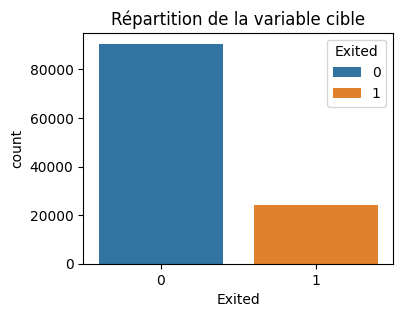

In [16]:
plt.figure(figsize=(4,3))
plt.title('Répartition de la variable cible')
sns.countplot(data=train_df, x='Exited', hue='Exited')
plt.show()

**Observations:** 

- Une majorité de client n´ont pas résilié.

- La répartition de la variable target est déséquilibré.

### 1.2 CustomerId

In [17]:
duplicated_customer_ids = train_df[train_df.duplicated(subset=['CustomerId'], keep=False)]['CustomerId']
print(f"Le dataset contient {duplicated_customer_ids.nunique()} CustomerId apparaissant plus d´une fois")
print("\n--- Nombre d'apparitions de chaque CustomerId dupliqué ---\n")
print(duplicated_customer_ids.value_counts())

Le dataset contient 12022 CustomerId apparaissant plus d´une fois

--- Nombre d'apparitions de chaque CustomerId dupliqué ---

CustomerId
15682355    90
15570194    72
15595588    67
15585067    67
15793331    66
            ..
15672631     2
15593495     2
15784687     2
15697589     2
15791881     2
Name: count, Length: 12022, dtype: int64


In [18]:
print(f"{int(100 * (train_df.CustomerId.nunique() - duplicated_customer_ids.nunique())/train_df.CustomerId.nunique())}% des clients ont une unique entrée dans le dataset.")

40% des clients ont une unique entrée dans le dataset.


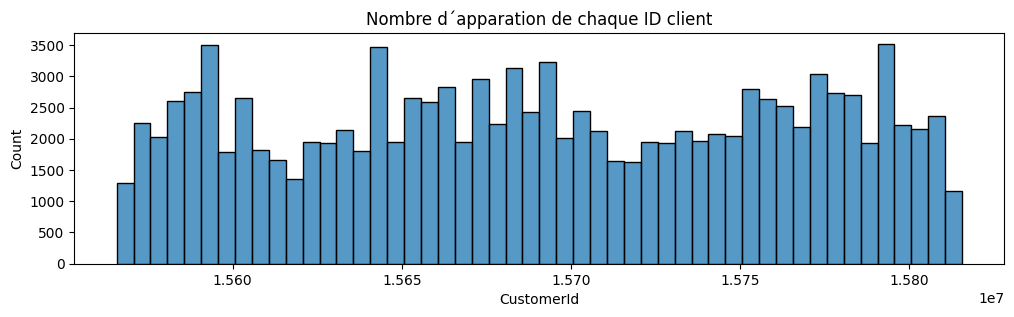

In [19]:
plt.figure(figsize=(12,3))
plt.title('Nombre d´apparation de chaque ID client')
sns.histplot(data=train_df, x='CustomerId')
plt.show()

**Observations:**
* 40% des clients n´ont qu´une seule entrée.
* Un client cumule 90 entrées et semble très éloigné de la moyenne.
* En moyenne un client est représenté 5,6 ± 7,2.

### 1.3 Surname

In [20]:
print("\n--- Dénombre les Surnames ---")
print(train_df.Surname.value_counts(normalize=True, sort=True, ascending=False))


--- Dénombre les Surnames ---
Surname
Hsia         0.014687
T'ien        0.013346
Hs?          0.009733
Ts'ui        0.009611
Kao          0.009559
               ...   
Truscott     0.000009
David        0.000009
Hopman       0.000009
Alexeieva    0.000009
Everett      0.000009
Name: proportion, Length: 2703, dtype: float64


([], [])

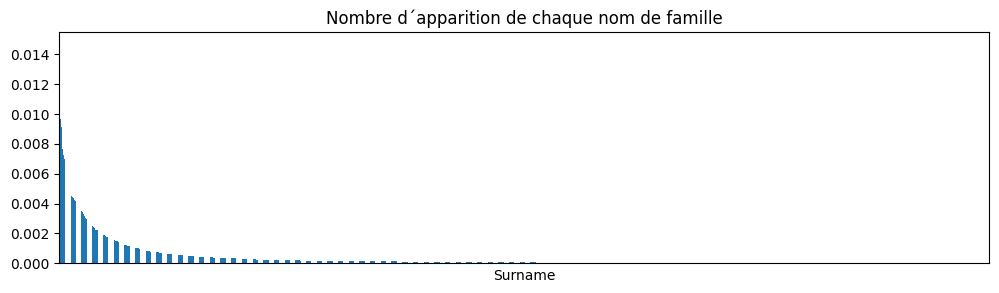

In [21]:
plt.title('Nombre d´apparition de chaque nom de famille')
train_df.Surname.value_counts(normalize=True, sort=True, ascending=False).plot(kind='bar', figsize=(12,3))
plt.xticks([])

**Observations:**
* Il y a 2703 nom de famille dans le dataset.

### 1.4 Geography

In [22]:
print("\n--- Dénombre la feature 'Geography' ---")
print(train_df.Geography.value_counts(normalize=True, sort=False, ascending=False))


--- Dénombre la feature 'Geography' ---
Geography
France     0.570924
Germany    0.209267
Spain      0.219810
Name: proportion, dtype: float64


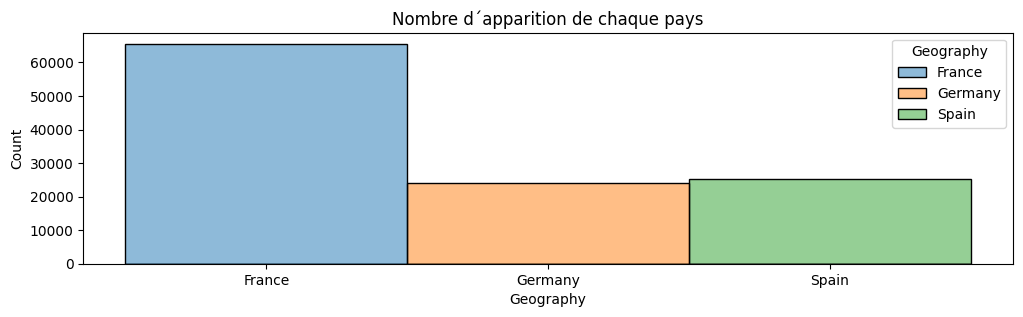

In [23]:
data = train_df.Geography.value_counts(ascending=False)
plt.figure(figsize=(12,3))
plt.title('Nombre d´apparition de chaque pays')
sns.histplot(data=train_df, x='Geography', hue='Geography')
plt.show()

**Vérifions si la fréquence théorique de la variable 'Geography' est identique à la fréquence observée.**

*Conditions:*
- Les observations sont indépendantes
- Il y a au moins 5 observations par catégorie.

On peut utiliser un test chi2

In [24]:
print(f"H0: Le pays des clients se répartie dans l´ensemble des données de manière suivante: 58% en France, 21% en Allemagne, 22% en Espagne.")
expected_freq = np.array([0.58, .21, .21])
expected_freq = expected_freq * train_df.shape[0]

observed_freq = train_df.Geography.value_counts(normalize=False, sort=False).round(2).values

result = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
check_hypothesis(result)


H0: Le pays des clients se répartie dans l´ensemble des données de manière suivante: 58% en France, 21% en Allemagne, 22% en Espagne.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**Observations:**
* Une majorité des observations viennent de France.
* Les données sont issues des banques francaises, allemandes, espagnoles.

**Conclusion:** Le test d´hypothése confirme que le payse d´origine du client n´est pas répartie de facon égale entre les pays.

### 1.5 Gender

In [25]:
print("\n--- Dénombre la feature 'Gender' ---")
print(train_df.Gender.value_counts(normalize=True, sort=True, ascending=False))


--- Dénombre la feature 'Gender' ---
Gender
Male      0.564377
Female    0.435623
Name: proportion, dtype: float64


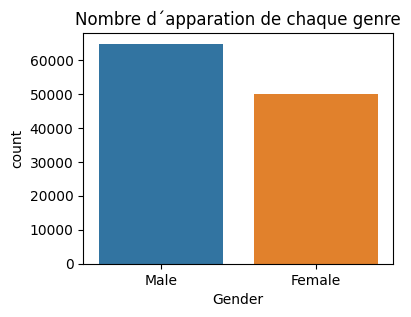

In [26]:
plt.figure(figsize=(4,3))
plt.title("Nombre d´apparation de chaque genre")
sns.countplot(data=train_df, x='Gender', hue='Gender')
plt.show()

**Vérifions si l´on peut appliquer un test binomial afin de regarder déterminer si les proportions de client hommes et femmes observées sont représentatif.**

*Conditions:*
- Les observations sont indépendantes
- Il y a au moins 10 observations par catégorie.

On peut utiliser un test binomial

In [27]:
p = 0.56
print(f"Hyphothèse H0: {int(p*100)}% des clients sont des hommes.")
n = train_df.shape[0]
k = int(train_df.Exited.value_counts()[0])
result = stats.binomtest(k=k, n=n, p=p)
check_hypothesis(result)

Hyphothèse H0: 56% des clients sont des hommes.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**Observations:** Le dataset contient majoritairement des hommes (56%)

**Conclusion:** On ne peut pas rejeter l´hypothèse que cette observation est avéré.

### 1.6 Age

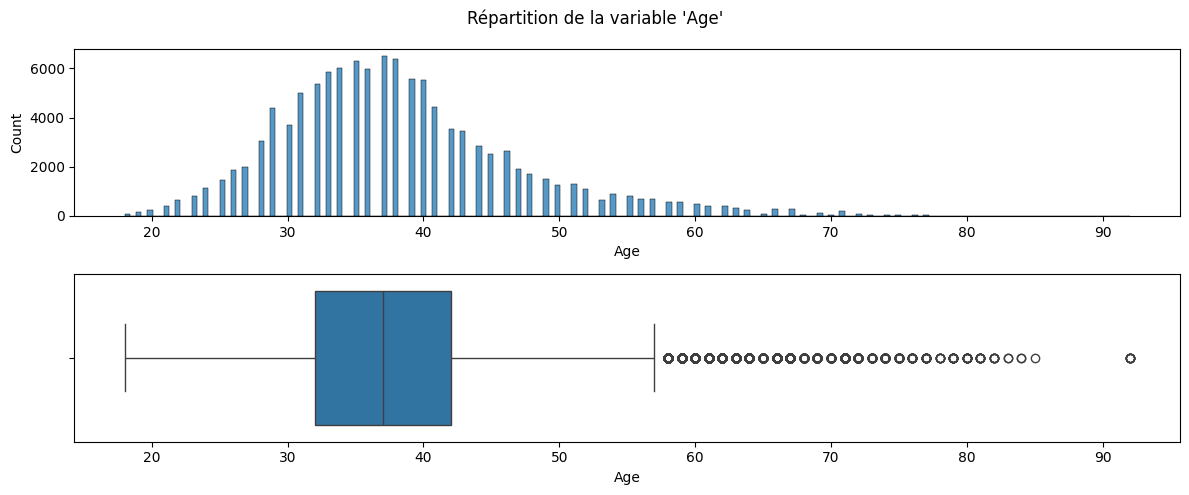

count    114863.000000
mean         38.139767
std           8.870904
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64
Skewness: 0.9704701666190407
Kurtosis: 1.5358900941327036


In [28]:
describe_distribution(train_df, 'Age')

**Observations:** Les clients ont en moyenne ´âge moyen est de 38 ± 8,9 an

### 1.7 Tenure

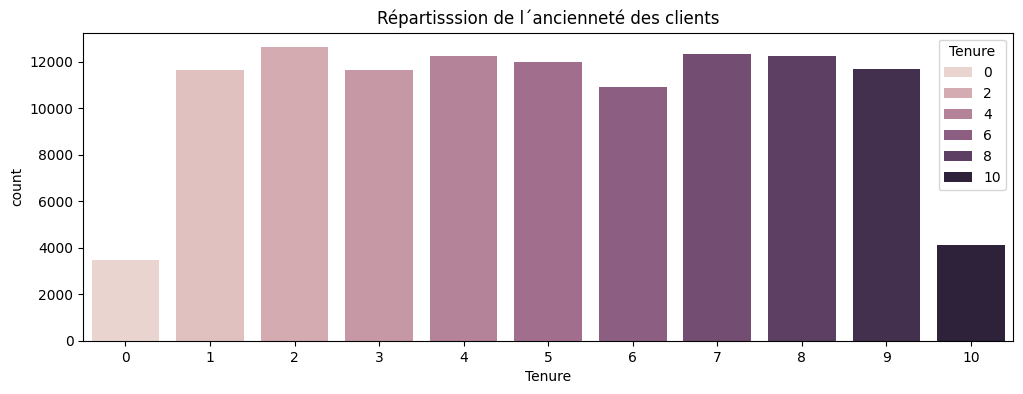

In [29]:
plt.figure(figsize=(12,4))
plt.title('Répartisssion de l´ancienneté des clients')
sns.countplot(data=train_df, x='Tenure', hue='Tenure')
plt.show()

In [30]:
train_df.Tenure.value_counts(normalize=True, sort=False)

Tenure
3     0.101199
7     0.107345
9     0.101704
2     0.109774
1     0.101434
6     0.095131
10    0.035764
4     0.106631
5     0.104263
8     0.106684
0     0.030071
Name: proportion, dtype: float64

### 1.8 NumOfProducts

In [31]:
print("\n--- Dénombre la feature 'NumOfProducts' ---")
print(train_df.NumOfProducts.value_counts(normalize=True, sort=True, ascending=False))


--- Dénombre la feature 'NumOfProducts' ---
NumOfProducts
2    0.510156
1    0.469586
3    0.017395
4    0.002864
Name: proportion, dtype: float64


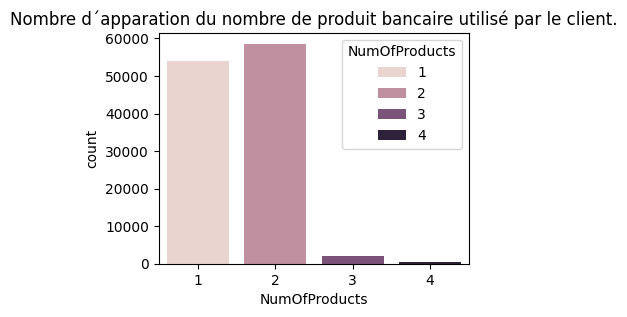

In [32]:
plt.figure(figsize=(4,3))
plt.title("Nombre d´apparation du nombre de produit bancaire utilisé par le client.")
sns.countplot(data=train_df, x='NumOfProducts', hue='NumOfProducts')
plt.show()

**Observations:** 
* Une large majorité de clients utilisent 1 ou 2 produits bancaires.
* Il y a 51% de clients utilisant 2 produits bancaires et 47% de clients utilisant 1 seul produit bancaire.
* Au maximum 4 produits bancaires sont utilisés par les clients.

### 1.9 HasCrCard

In [33]:
print("\n--- Dénombre la feature 'HasCrCard' ---")
print(train_df.HasCrCard.value_counts(normalize=True, sort=False))


--- Dénombre la feature 'HasCrCard' ---
HasCrCard
1.0    0.754046
0.0    0.245954
Name: proportion, dtype: float64


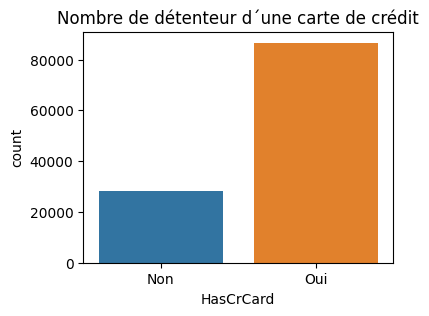

In [34]:
plt.figure(figsize=(4,3))
plt.title("Nombre de détenteur d´une carte de crédit")
sns.countplot(data=train_df, x='HasCrCard', hue='HasCrCard')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.legend([],[], frameon=False)
plt.show()

**Observations:** Une large majorité de client possède une carte de crédit.

### 1.10 IsActiveMember

In [35]:
print("\n--- Dénombre les clients actifs ---")
print(train_df.IsActiveMember.value_counts(normalize=True, sort=False))


--- Dénombre les clients actifs ---
IsActiveMember
1.0    0.497097
0.0    0.502903
Name: proportion, dtype: float64


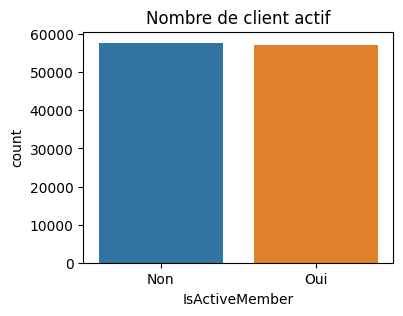

In [36]:
plt.figure(figsize=(4,3))
plt.title("Nombre de client actif")
sns.countplot(data=train_df, x='IsActiveMember', hue='IsActiveMember')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.legend([],[], frameon=False)
plt.show()

**Observations:** On a autant de client actif qu´inactif dans le jeu de donnée.



## 2. Analyse des variables continues
### 2.1 CreditScore

In [37]:
train_df.CreditScore.describe()

count    114863.000000
mean        656.524947
std          80.008532
min         350.000000
25%         598.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

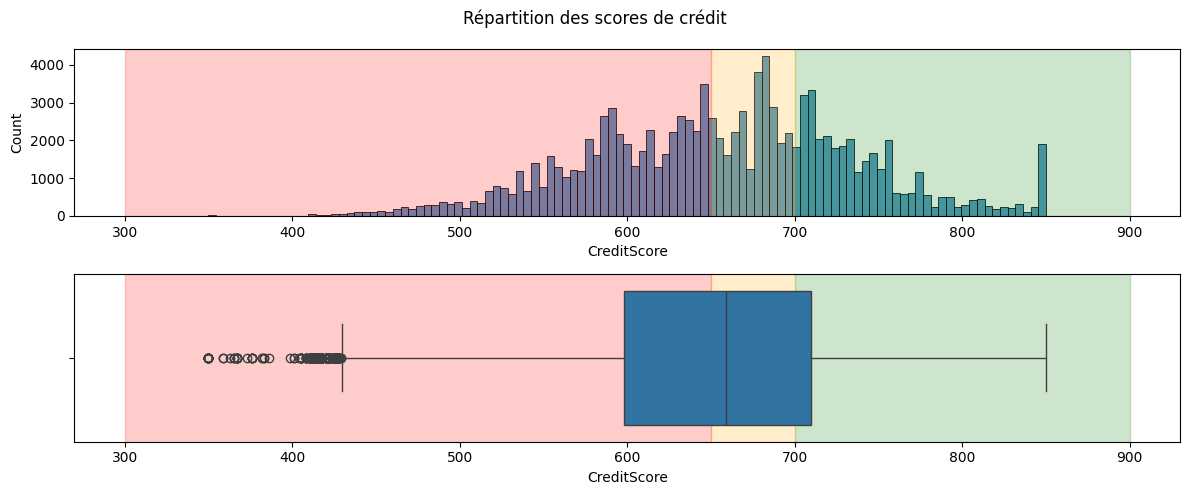

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
plt.suptitle('Répartition des scores de crédit')
sns.histplot(data=train_df, x='CreditScore', ax=ax[0])
sns.boxplot(data=train_df, x='CreditScore', ax=ax[1])
ax[0].axvspan(700, 900, alpha=0.2, color='green')
ax[0].axvspan(650, 700, alpha=0.2, color='orange')
ax[0].axvspan(300, 650, alpha=0.2, color='red')
ax[1].axvspan(700, 900, alpha=0.2, color='green')
ax[1].axvspan(650, 700, alpha=0.2, color='orange')
ax[1].axvspan(300, 650, alpha=0.2, color='red')
plt.tight_layout()
plt.show()

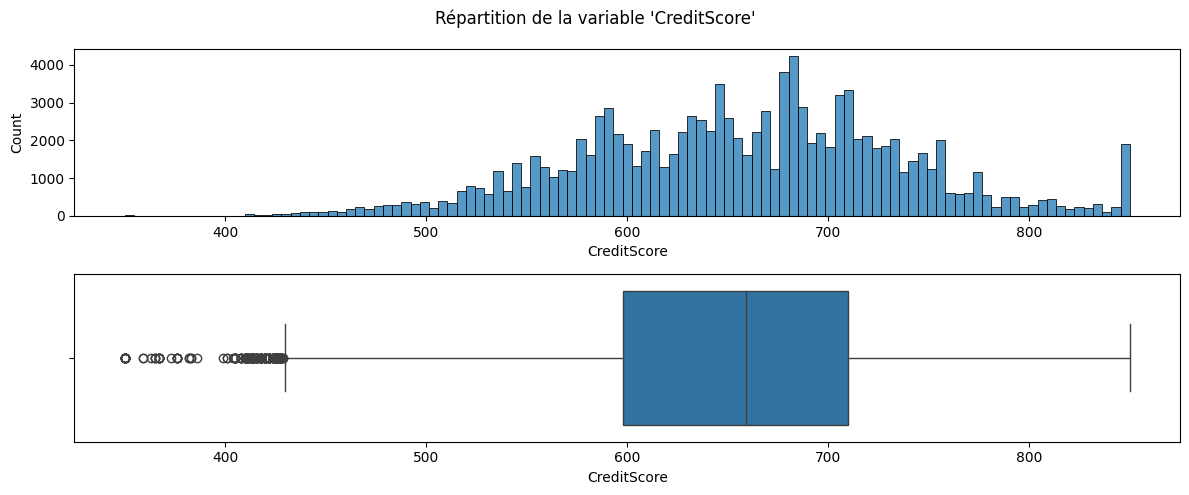

count    114863.000000
mean        656.524947
std          80.008532
min         350.000000
25%         598.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64
Skewness: -0.05708995420240333
Kurtosis: -0.06426941214061266


In [39]:
describe_distribution(train_df, 'CreditScore')

On exclut les valeurs extrêmes pour mieux visualiser la distribution.


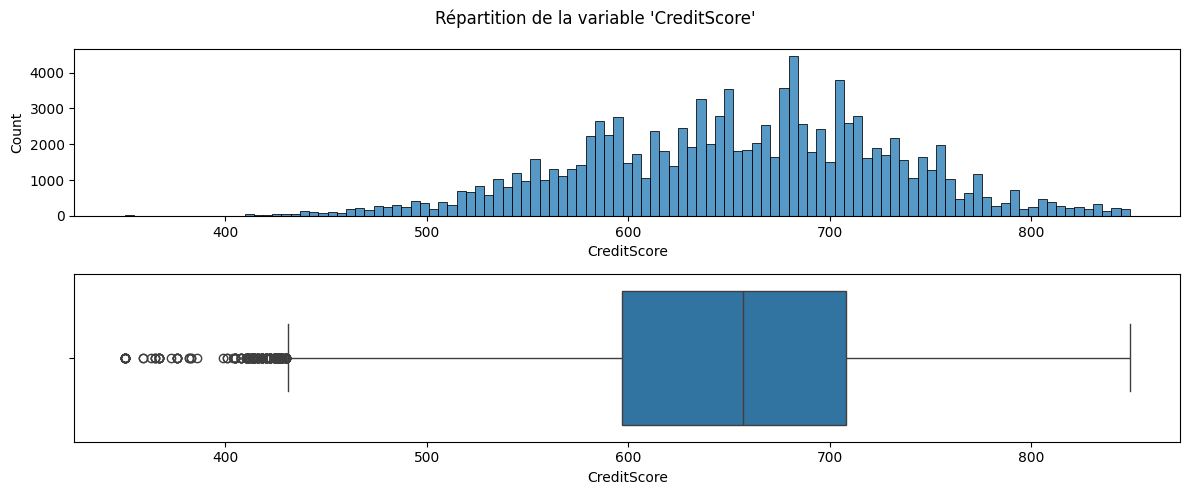

count    113107.000000
mean        653.521223
std          76.880263
min         350.000000
25%         597.000000
50%         657.000000
75%         708.000000
max         849.000000
Name: CreditScore, dtype: float64
Skewness: -0.19551543107317543
Kurtosis: -0.16544602261066466


In [40]:
print("On exclut les valeurs extrêmes pour mieux visualiser la distribution.")
describe_distribution(train_df.query('`CreditScore` != 850'), 'CreditScore')

### 2.2 Balance

In [41]:
train_df.Balance.describe(percentiles=[.1, .54,.55, .75, .9, .95, .99])

count    114863.000000
mean      55509.177787
std       62804.248897
min           0.000000
10%           0.000000
50%           0.000000
54%           0.000000
55%       64345.210000
75%      119912.460000
90%      139959.098000
95%      151739.650000
99%      172376.923200
max      250898.090000
Name: Balance, dtype: float64

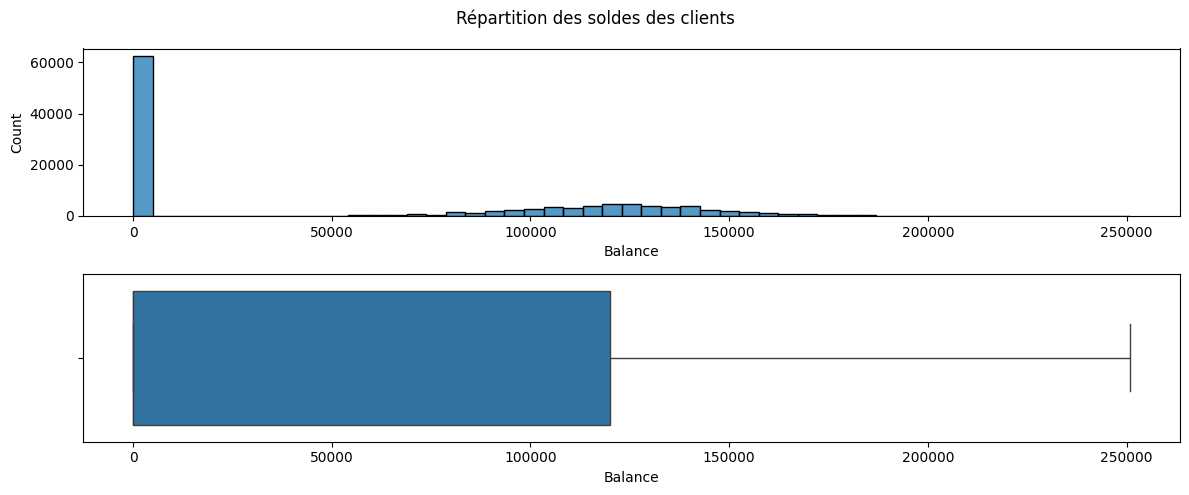

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
plt.suptitle('Répartition des soldes des clients')
sns.histplot(data=train_df, x='Balance', ax=ax[0])
sns.boxplot(data=train_df, x='Balance', ax=ax[1])
plt.tight_layout()
plt.show()

On exclut les valeurs extrêmes pour mieux visualiser la distribution.


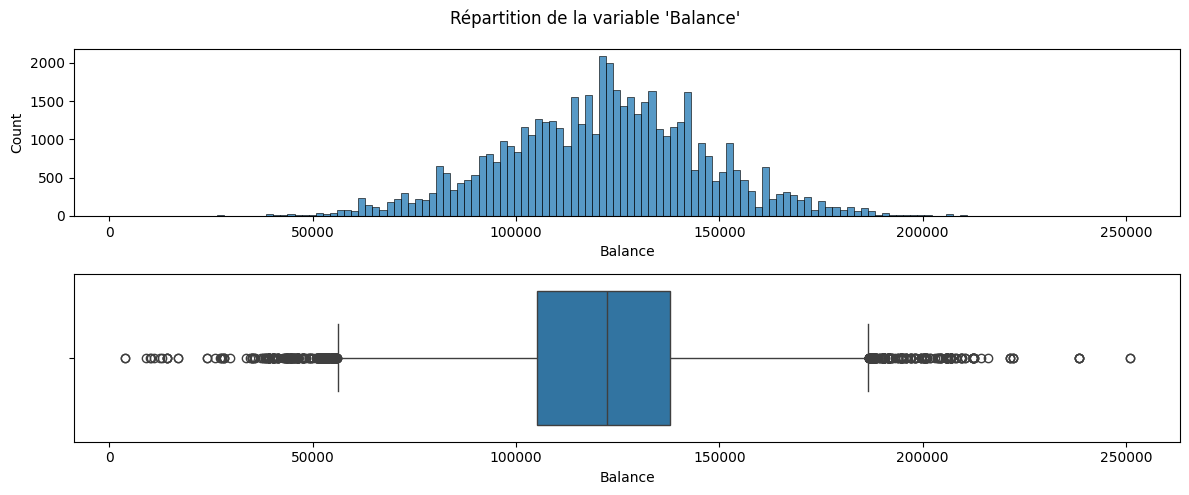

count     52519.000000
mean     121402.743543
std       25038.347392
min        3768.690000
25%      105128.850000
50%      122314.100000
75%      137780.740000
max      250898.090000
Name: Balance, dtype: float64
Skewness: -0.044328272452956584
Kurtosis: 0.3342967139954256


In [43]:
print("On exclut les valeurs extrêmes pour mieux visualiser la distribution.")
describe_distribution(train_df.query('`Balance` != 0'), 'Balance')

### 2.3 EstimatedSalary

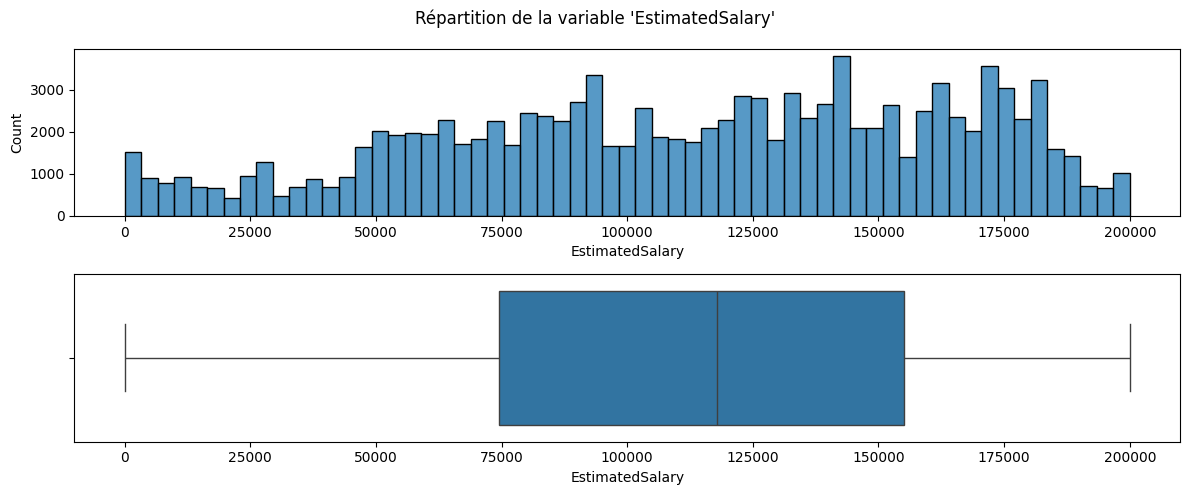

count    114863.000000
mean     112504.938242
std       50300.140367
min          11.580000
25%       74532.020000
50%      117832.880000
75%      155023.930000
max      199992.480000
Name: EstimatedSalary, dtype: float64
Skewness: -0.3064000955887434
Kurtosis: -0.840770936365479


In [44]:
describe_distribution(train_df, 'EstimatedSalary')

## 3 Analyse Multivariée
### 3.1 Exited vs variable discrètes

In [45]:
# Vérifier si un CustomerId a des valeurs 'Exited' différentes à travers les lignes
different_exited_values = train_df[train_df['CustomerId'].isin(duplicated_customer_ids)].groupby('CustomerId')['Exited'].nunique() > 1

# Filter CustomerIds that have different 'Exited' values
customer_ids_with_different_exited_values = different_exited_values[different_exited_values].size



if customer_ids_with_different_exited_values:
    client_ratio = int(100 * customer_ids_with_different_exited_values / duplicated_customer_ids.nunique())
    print(f"Les CustomerIds avec des valeurs 'Exited' différentes représentent {client_ratio}% des CustomerIds dupliqués.")
else:
    print("Les CustomerIds ont tous une unique valeur pour la colonne target.")

Les CustomerIds avec des valeurs 'Exited' différentes représentent 71% des CustomerIds dupliqués.


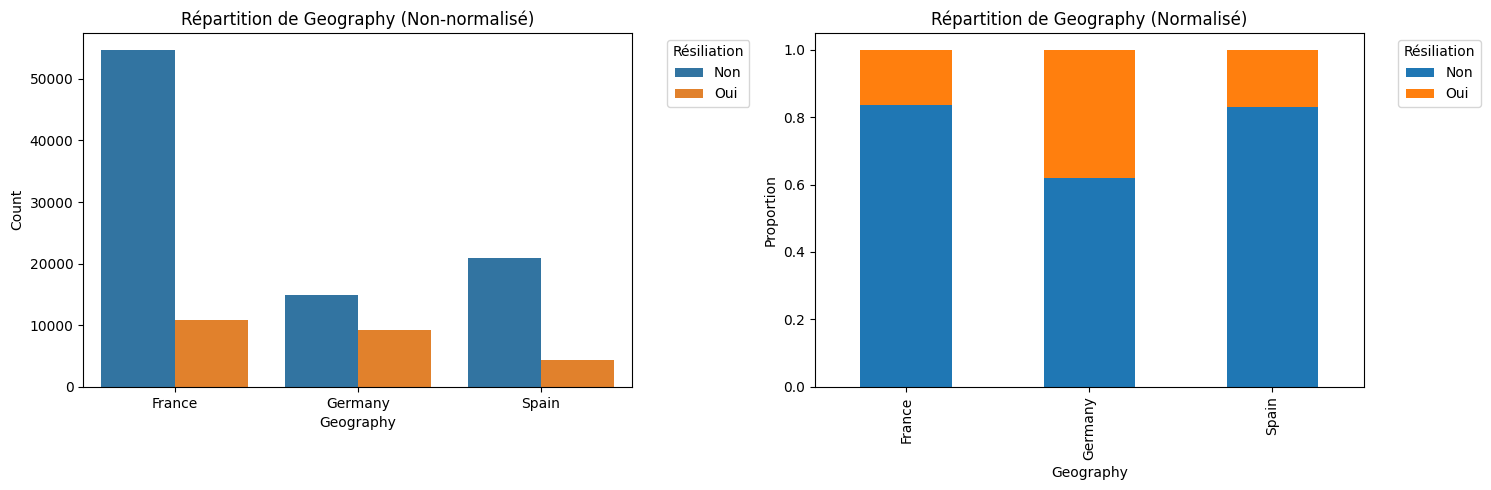

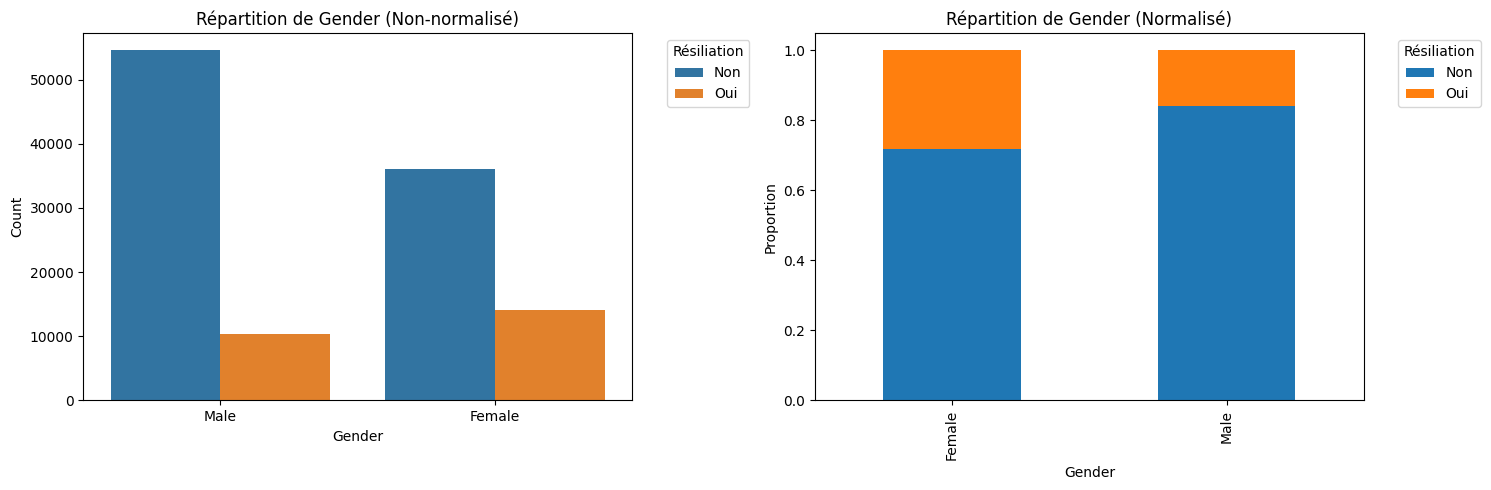

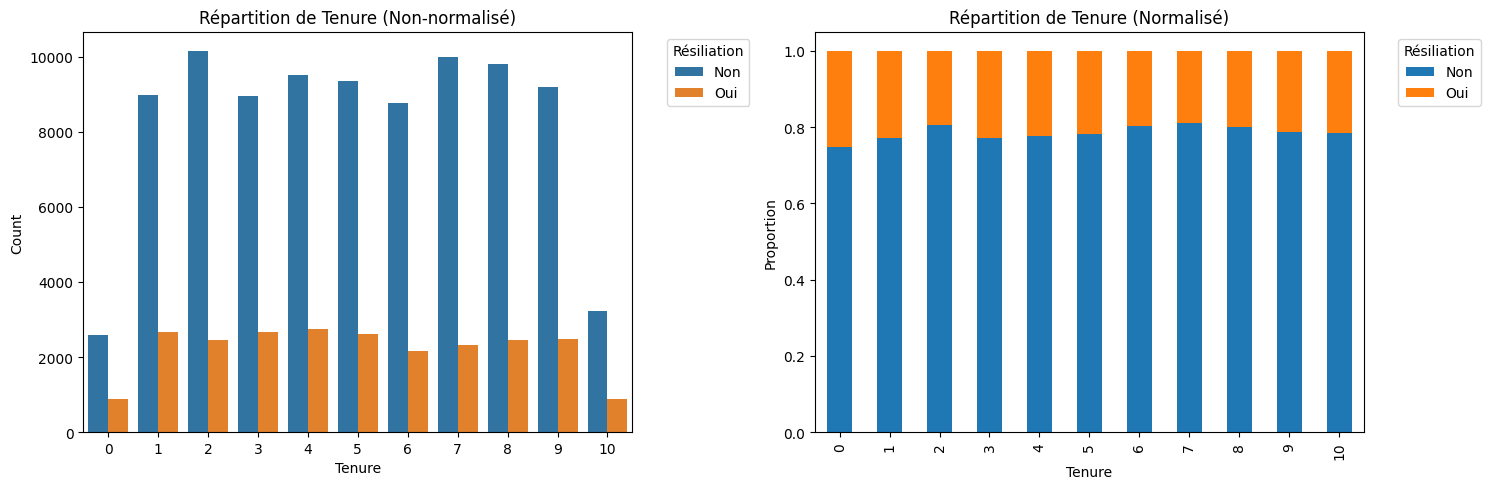

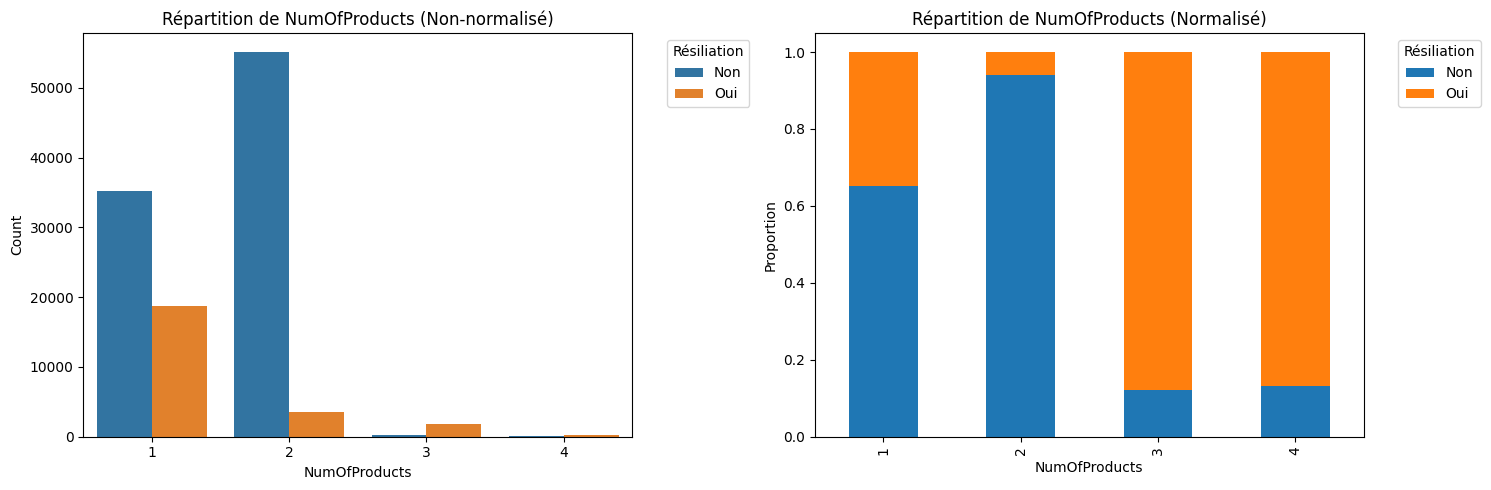

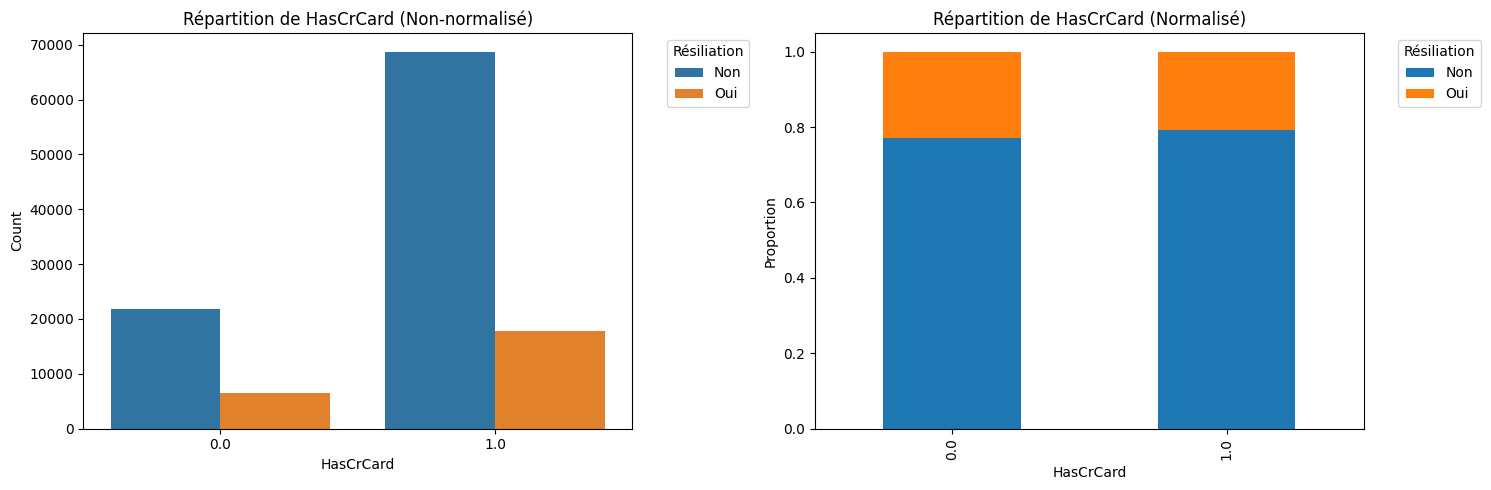

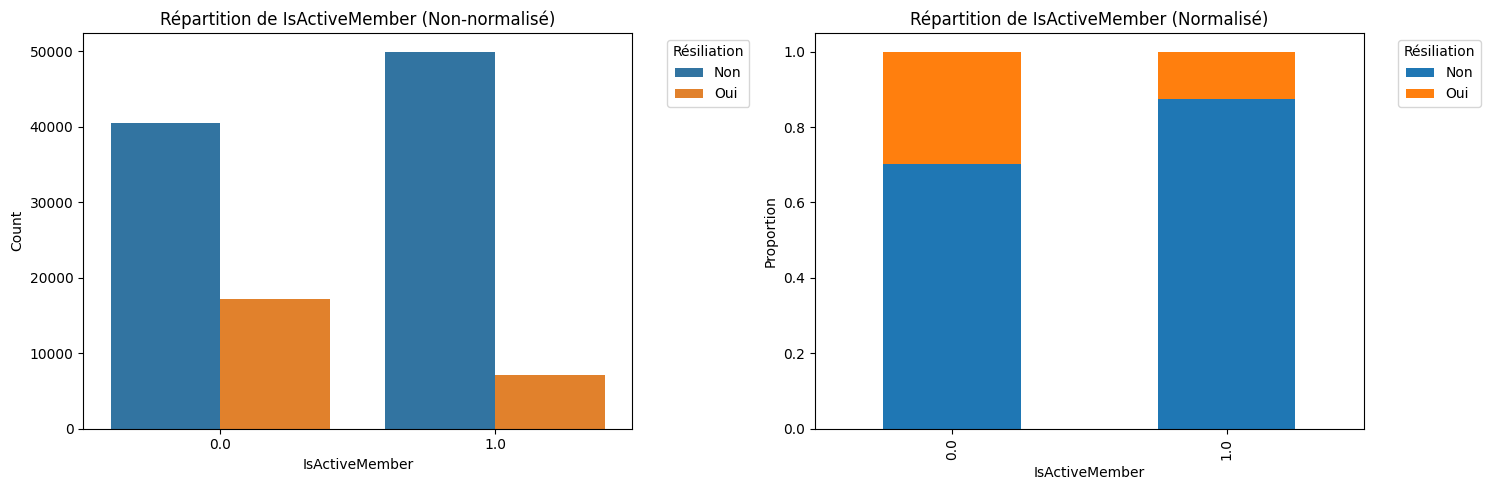

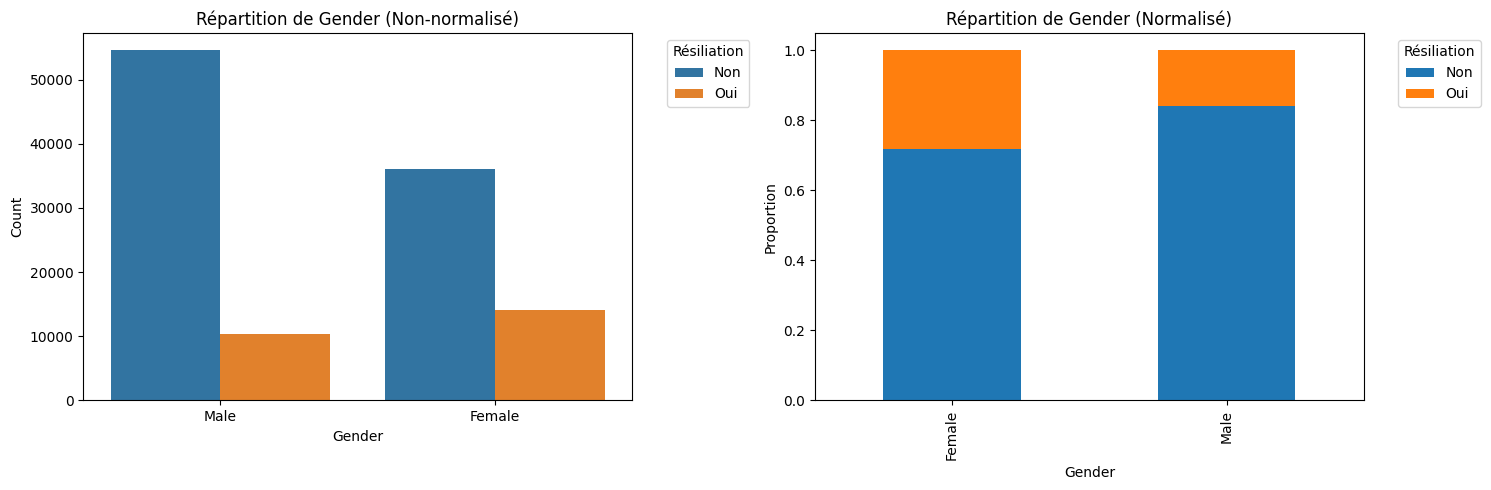

In [84]:
columns = DISCRETES_COLUMNS + ['Gender']
for col in columns:
    if col in ['CustomerId', 'Surname']:
        continue
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Non-normalized count plot
    sns.countplot(data=train_df, x=col, hue='Exited', ax=axes[0])
    axes[0].set_title(f'Répartition de {col} (Non-normalisé)')
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Résiliation', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Non', 'Oui'])
    
    # Normalized proportional plot
    crosstab = pd.crosstab(train_df[col], train_df['Exited'], normalize='index')
    crosstab.plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title(f'Répartition de {col} (Normalisé)')
    axes[1].set_ylabel('Proportion')
    axes[1].legend(title='Résiliation', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Non', 'Oui'])
    
    plt.tight_layout()
    plt.show()

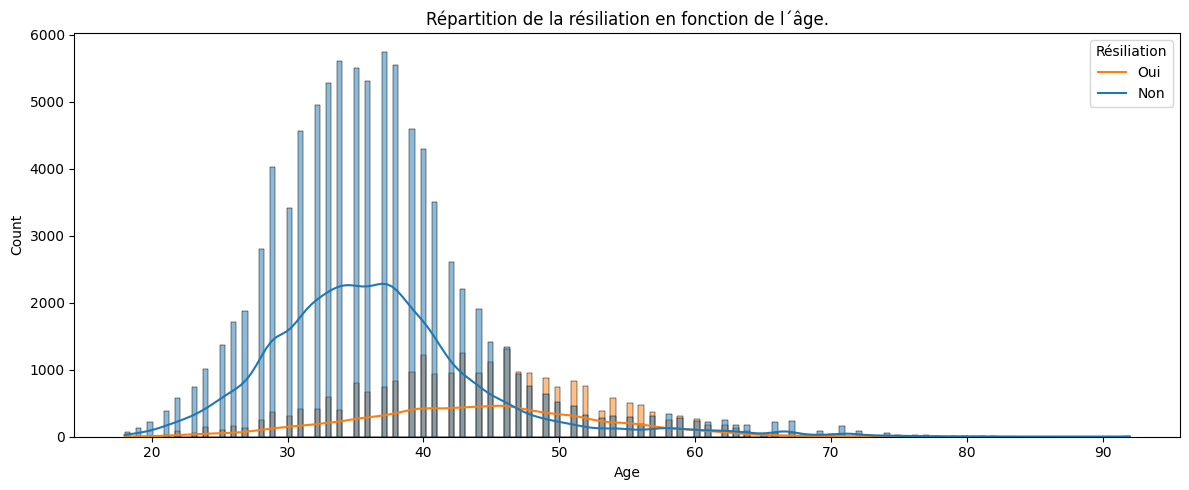

In [48]:
plt.figure(figsize=(12,5))
plt.title('Répartition de la résiliation en fonction de l´âge.')
sns.histplot(data=train_df, x='Age', hue='Exited', kde=True)
plt.legend(title='Résiliation', labels=['Oui', 'Non'])
plt.tight_layout()
plt.show()

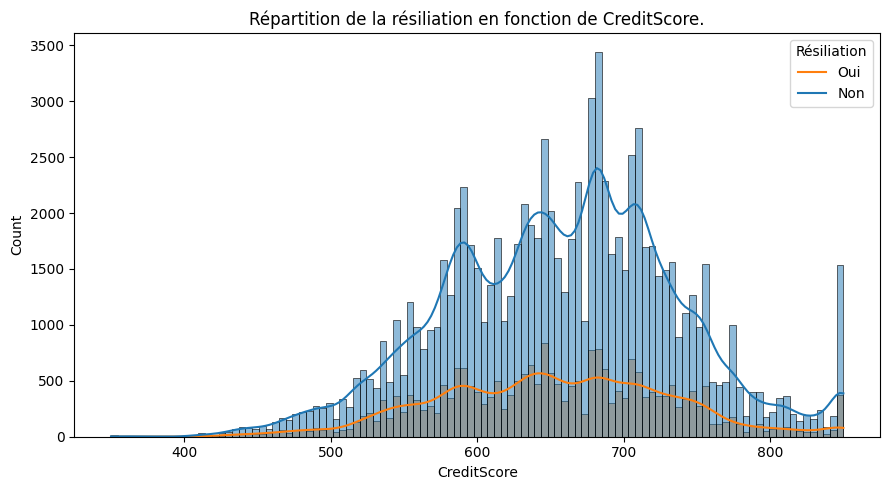

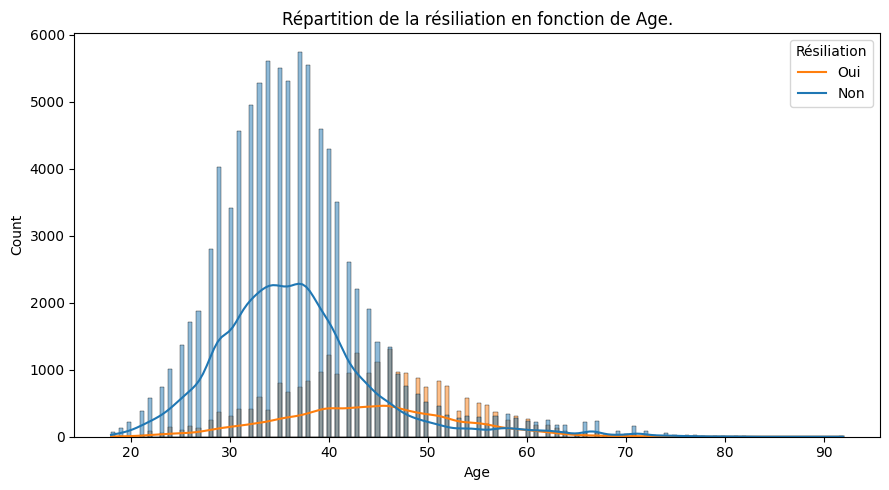

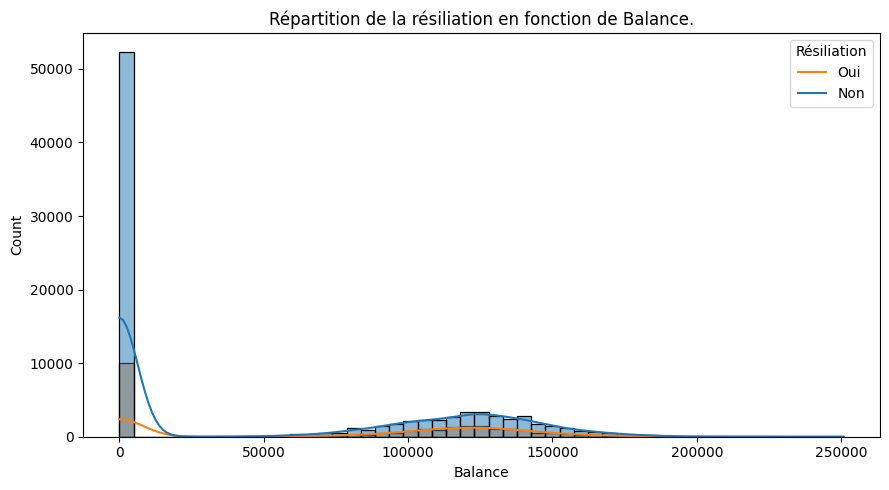

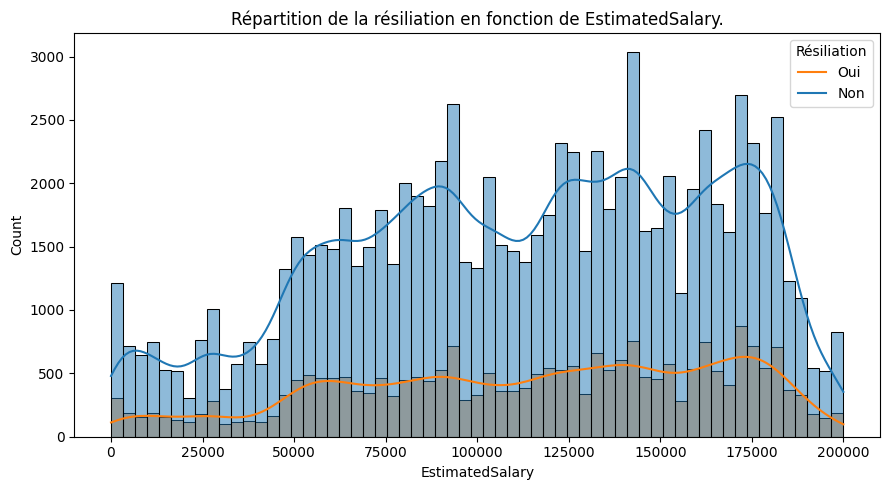

In [49]:
for col in CONTINUOUS_COLUMNS:
    plt.figure(figsize=(9,5))
    plt.title(f'Répartition de la résiliation en fonction de {col}.')
    sns.histplot(data=train_df, x=col, hue='Exited', kde=True)
    plt.legend(title='Résiliation', labels=['Oui', 'Non'])
    plt.tight_layout()
    plt.show()

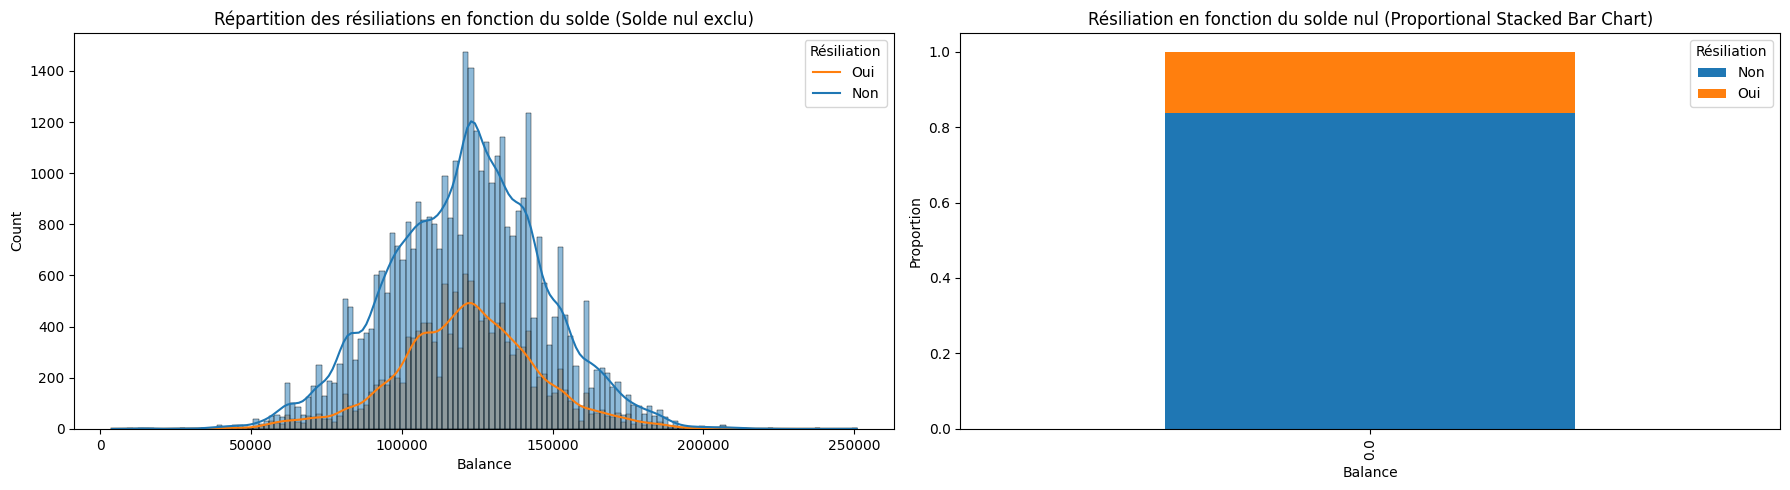

In [62]:
compte_avec_solde = train_df.query('`Balance` != 0')
compte_sans_solde = train_df.query('`Balance` == 0')

fig, ax = plt.subplots(1, 2, figsize=(18,5))

# Plot for Balance != 0
ax[0].set_title('Répartition des résiliations en fonction du solde (Solde nul exclu)')
sns.histplot(data=compte_avec_solde, x='Balance', hue='Exited', kde=True, ax=ax[0])
ax[0].legend(title='Résiliation', labels=['Oui', 'Non'])

# Plot for Balance == 0
ax[1].set_title('Répartition de la résiliation en fonction du solde (Balance == 0)')
crosstab = pd.crosstab(compte_sans_solde['Balance'], train_df['Exited'], normalize='index')
crosstab.plot(kind="bar", stacked=True, ax=ax[1])
plt.ylabel('Proportion')
plt.title(f'Résiliation en fonction du solde nul (Proportional Stacked Bar Chart)')
ax[1].legend(title='Résiliation', labels=['Non', 'Oui'])
plt.tight_layout()
plt.show()

# Combine the data for plotting
combined_data = pd.concat([
    compte_avec_solde.assign(BalanceCategory='Avec Solde'),
    compte_sans_solde.assign(BalanceCategory='Sans Solde')
])



On cherche a voir si les clients avec un solde non nul sont plus enclins à résilier leur compte.


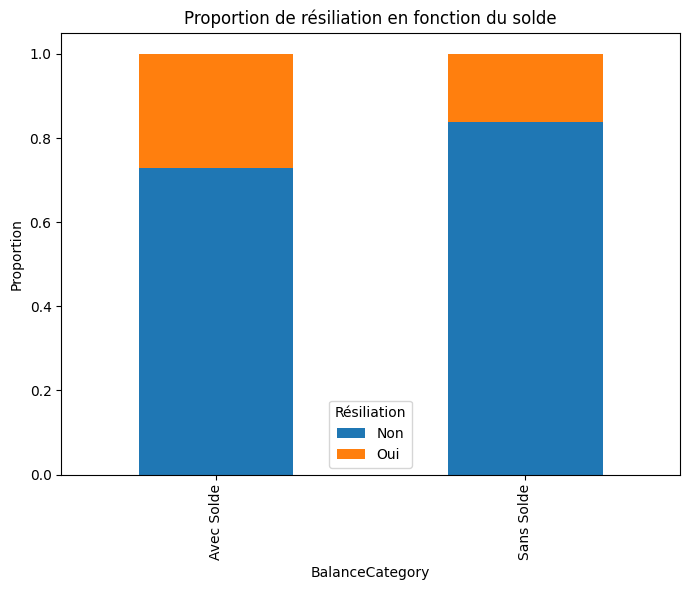

In [69]:
print("On cherche a voir si les clients avec un solde non nul sont plus enclins à résilier leur compte.")

# Plot the stacked bar chart
plt.figure(figsize=(7, 6))
plt.title('Proportion de résiliation en fonction du solde')
crosstab = pd.crosstab(combined_data['BalanceCategory'], combined_data['Exited'], normalize='index')
crosstab.plot(kind="bar", stacked=True, ax=plt.gca())
plt.ylabel('Proportion')
plt.legend(title='Résiliation', labels=['Non', 'Oui'])
plt.tight_layout()
plt.show()

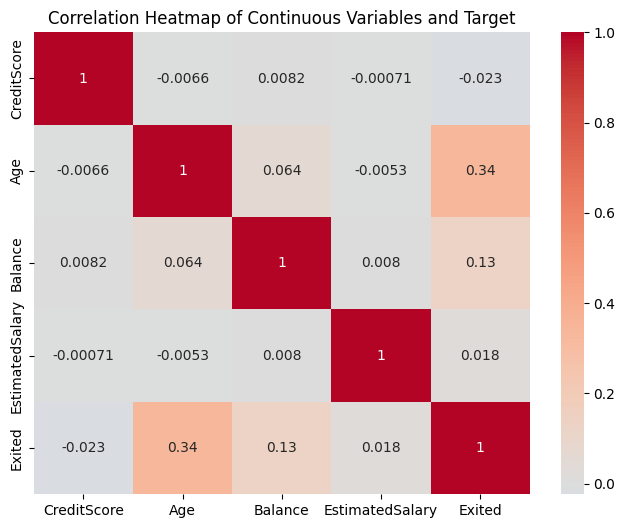

In [51]:
# Calculate the correlation matrix
correlation_matrix = train_df[CONTINUOUS_COLUMNS + ['Exited']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Continuous Variables and Target')
plt.show()

## Test d´hypothèse

### Les clients allemands ont tendance à résilier davantage que les autres clients des autres pays.
**Condition:**
- Les observations sont indépendantes les unes des autres
- Il y a plus de 5 observations par categories

In [ ]:
print("H0: Le pays de résidence du client et le fait de résilier son compte sont indépendants.")
crosstab = pd.crosstab(train_df['Geography'], train_df['Exited'])
result = stats.chi2_contingency(crosstab)
check_hypothesis(result)

H0: Le pays de résidence du client et le fait de résilier son compte sont indépendants.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**conclusion:** Le pays d´origine du client a une influence sur le fait de résilié ou pas.

### Les clients qui ont plus de 3 produits résilie davantage.
**Condition:**
- Les observations sont indépendantes les unes des autres
- Il y a plus de 5 observations par categories

In [71]:
print("H0: Le nombre de produits détenu par un client n´a aucune influence sur le fait de résilier.")
crosstab = pd.crosstab(train_df['NumOfProducts'], train_df['Exited'])
result = stats.chi2_contingency(crosstab)
check_hypothesis(result)

H0: Le nombre de produits détenu par un client n´a aucune influence sur le fait de résilier.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**conclusion:** On a suffisamment d´évidence pour affirmer que le nombre de produits détenu par le client influence le choix de résilier.

### Les clients membre inactifs résilie davantage que les autres

**Condition:**
- Les observations sont indépendantes les unes des autres
- Il y a plus de 5 observations par categories

In [72]:
print("H0: Les membres actif résilie autant que les membres inactifs.")
crosstab = pd.crosstab(train_df['IsActiveMember'], train_df['Exited'])
result = stats.chi2_contingency(crosstab)
check_hypothesis(result)

H0: Les membres actif résilie autant que les membres inactifs.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**conclusions:** Le fait que le client soit actif ou non n´a pas d´influence sur le fait de résilier son compte.

###  Les femmes résilie davantage que les hommes
**Condition:**
- Les observations sont indépendantes les unes des autres
- Il y a plus de 5 observations par categories

In [73]:
print("H0: Les hommes résilie autant que les femmes.")
crosstab = pd.crosstab(train_df['Gender'], train_df['Exited'])
result = stats.chi2_contingency(crosstab)
check_hypothesis(result)

H0: Les hommes résilie autant que les femmes.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

**conclusion:** Les femmes résilie davantage que les hommes.

### L’âge des clients qui résilie de ceux qui ne résilie pas appartiennent à deux distributions différentes.

In [78]:
print("H0: Il n´y a pas de différence d´âge entre les clients qui résilient et ceux qui restent.")
# Separate ages for churned and non-churned customers
exited_customers = train_df[train_df['Exited'] == 1]['Age']
non_exited_customers = train_df[train_df['Exited'] == 0]['Age']

# Perform Levene's test for equal variances
levene_stat, levene_p = stats.levene(exited_customers, non_exited_customers)
print(f"Levene's test p-value: {levene_p}")

# If Levene's test p-value is > 0.05, assume equal variances
if levene_p > 0.05:
    result = stats.ttest_ind(exited_customers, non_exited_customers, equal_var=True)
else:
    # If variances are unequal, use Welch's t-test
    result = stats.ttest_ind(exited_customers, non_exited_customers, equal_var=False)


print(f"T-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

check_hypothesis(result)

H0: Il n´y a pas de différence d´âge entre les clients qui résilient et ceux qui restent.
Levene's test p-value: 7.139531326853492e-218
T-statistic: 115.46439587172817
P-value: 0.0


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'

### Les clients ayant un solde de compte à zero résilie moins que les autres.
**Condition:**
- Les observations sont indépendantes les unes des autres
- Il y a plus de 5 observations par categories

In [80]:
data = train_df.copy()
data['ZeroBalance'] = data['Balance'] == 0
data['ZeroBalance'] = data['ZeroBalance'].astype(int)

print("H0: Les clients ayant un solde nulle résilient autant que les autres.")
crosstab = pd.crosstab(data['ZeroBalance'], data['Exited'])
result = stats.chi2_contingency(crosstab)
check_hypothesis(result)

H0: Les clients ayant un solde nulle résilient autant que les autres.


'Nous avons suffisamment d´évidence pour rejeter l´hypothèse nulle'